In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-youtube-music-hits-2025/youtube-top-100-songs-2025.csv


# Imports

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

Let's ask some basic questions

In [4]:
Yt = pd.read_csv('/kaggle/input/top-youtube-music-hits-2025/youtube-top-100-songs-2025.csv')
Yt.shape

(100, 13)

In [5]:
Yt.sample(5)

,title,fulltitle,description,view_count,categories,tags,duration,duration_string,live_status,thumbnail,channel,channel_url,channel_follower_count
18,Teddy Swims - Bad Dreams (Official Music Video),Teddy Swims - Bad Dreams (Official Music Video),"Stream ""Bad Dreams"" now: https://TeddySwims.ln...",160421970,Music,teddy swims;lose control;lose control live per...,185,3:05,False,https://i.ytimg.com/vi_webp/Qh8QwVYOSVU/maxres...,Teddy Swims,https://www.youtube.com/channel/UCb-ikMqe9iS8G...,6070000
24,Doechii - Anxiety (Official Video),Doechii - Anxiety (Official Video),“Anxiety” Doechii\n\nDirected by James Mackel ...,51336708,Music,Doechii;Top Dawg Entertainment/Capitol Records...,252,4:12,False,https://i.ytimg.com/vi/riCP9x31Kuk/maxresdefau...,Doechii,https://www.youtube.com/channel/UC9bzTEvPeXjS6...,3140000
34,ROSÉ - number one girl (official music video),ROSÉ - number one girl (official music video),ROSÉ - number one girl\ndownload/stream: http...,119135427,Music,YG Entertainment;YG;와이지;K-pop;BLACKPINK;블랙핑크;블...,218,3:38,False,https://i.ytimg.com/vi_webp/pZ1NdE69VTs/maxres...,ROSÉ,https://www.youtube.com/channel/UCBo1hnzxV9rz3...,19200000
12,Kendrick Lamar - luther (Official Audio),Kendrick Lamar - luther (Official Audio),Kendrick Lamar “GNX” is available now: https:/...,142084039,People & Blogs,NaN,178,2:58,False,https://i.ytimg.com/vi/HfWLgELllZs/maxresdefau...,Kendrick Lamar,https://www.youtube.com/channel/UC3lBXcrKFnFAF...,19700000
2,Reneé Rapp - Leave Me Alone (Official Music Vi...,Reneé Rapp - Leave Me Alone (Official Music Vi...,"Listen to “BITE ME”, the new album from Reneé ...",2536628,Music,Reneé Rapp;Interscope Records;Pop,160,2:40,False,https://i.ytimg.com/vi/tiPWzFLiz4A/maxresdefau...,Reneé Rapp,https://www.youtube.com/channel/UCZy4ki_L4bzw9...,408000


In [6]:
Yt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   title                   100 non-null    object
 1   fulltitle               100 non-null    object
 2   description             100 non-null    object
 3   view_count              100 non-null    int64 
 4   categories              100 non-null    object
 5   tags                    85 non-null     object
 6   duration                100 non-null    int64 
 7   duration_string         100 non-null    object
 8   live_status             100 non-null    bool  
 9   thumbnail               100 non-null    object
 10  channel                 100 non-null    object
 11  channel_url             100 non-null    object
 12  channel_follower_count  100 non-null    int64 
dtypes: bool(1), int64(3), object(9)
memory usage: 9.6+ KB


In [7]:
Yt.isnull().mean()*100

title                      0.0
fulltitle                  0.0
description                0.0
view_count                 0.0
categories                 0.0
tags                      15.0
duration                   0.0
duration_string            0.0
live_status                0.0
thumbnail                  0.0
channel                    0.0
channel_url                0.0
channel_follower_count     0.0
dtype: float64

In [8]:
Yt.describe()

,view_count,duration,channel_follower_count
count,1.000000e+02,100.000000,1.000000e+02
mean,1.059103e+08,203.900000,1.612067e+07
std,2.491132e+08,44.260592,1.980038e+07
min,1.161000e+03,120.000000,1.000000e+00
25%,1.852702e+07,173.000000,6.132500e+05
50%,3.798224e+07,193.500000,6.320000e+06
75%,1.111073e+08,231.750000,2.760000e+07
max,2.009015e+09,354.000000,7.620000e+07


In [9]:
Yt.duplicated().sum()

0

In [10]:
numerical_Yt = Yt.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_Yt.corr(method="pearson")
print(correlation_matrix)


                        view_count  duration  channel_follower_count
view_count                1.000000  0.102707                0.113510
duration                  0.102707  1.000000                0.210203
channel_follower_count    0.113510  0.210203                1.000000


In [11]:
Yt['channel_follower_count'].value_counts()

channel_follower_count
12300000    7
6320000     4
19200000    3
19700000    3
29600000    3
           ..
5350000     1
16100       1
31500000    1
142000      1
5200000     1
Name: count, Length: 65, dtype: int64

# EDA

In [12]:
# # analyse graphs
# from ydata_profiling import ProfileReport

# prof = ProfileReport(Yt)
# prof.to_file(output_file="output.html")

In [13]:
Yt.head()

,title,fulltitle,description,view_count,categories,tags,duration,duration_string,live_status,thumbnail,channel,channel_url,channel_follower_count
0,ROSÉ & Bruno Mars - APT. (Official Music Video),ROSÉ & Bruno Mars - APT. (Official Music Video),ROSÉ & Bruno Mars - APT.\nDownload/stream: ht...,2009014557,Music,YG Entertainment;YG;와이지;K-pop;BLACKPINK;블랙핑크;블...,173,2:53,False,https://i.ytimg.com/vi_webp/ekr2nIex040/maxres...,ROSÉ,https://www.youtube.com/channel/UCBo1hnzxV9rz3...,19200000
1,"Lady Gaga, Bruno Mars - Die With A Smile (Offi...","Lady Gaga, Bruno Mars - Die With A Smile (Offi...",MAYHEM OUT NOW\nhttp://ladygaga.com \n \nListe...,1324833300,Music,Lady Gaga;Bruno Mars;Interscope;Pop,252,4:12,False,https://i.ytimg.com/vi/kPa7bsKwL-c/maxresdefau...,Lady Gaga,https://www.youtube.com/channel/UC07Kxew-cMIay...,29600000
2,Reneé Rapp - Leave Me Alone (Official Music Vi...,Reneé Rapp - Leave Me Alone (Official Music Vi...,"Listen to “BITE ME”, the new album from Reneé ...",2536628,Music,Reneé Rapp;Interscope Records;Pop,160,2:40,False,https://i.ytimg.com/vi/tiPWzFLiz4A/maxresdefau...,Reneé Rapp,https://www.youtube.com/channel/UCZy4ki_L4bzw9...,408000
3,Billie Eilish - BIRDS OF A FEATHER (Official M...,Billie Eilish - BIRDS OF A FEATHER (Official M...,Listen to HIT ME HARD AND SOFT: https://billie...,558329099,Music,Billie Eilish;Darkroom/Interscope Records;Alte...,231,3:51,False,https://i.ytimg.com/vi/V9PVRfjEBTI/maxresdefau...,Billie Eilish,https://www.youtube.com/channel/UCDGmojLIoWpXo...,56800000
4,Reneé Rapp - Mad (Official Music Video),Reneé Rapp - Mad (Official Music Video),"Listen to “BITE ME”, the new album from Reneé ...",2113548,Music,Reneé Rapp;Interscope Records;Pop,180,3:00,False,https://i.ytimg.com/vi/xkWQM3flsiY/maxresdefau...,Reneé Rapp,https://www.youtube.com/channel/UCZy4ki_L4bzw9...,408000


# missing value replace

In [14]:
Yt['tags'] = Yt['tags'].fillna(Yt['channel'])

# feature extraction

In [15]:
def myfun(num):
    if num >= 1000000:
        return 1
    else:
        return 0 

In [16]:
Yt['Hits'] = Yt['view_count'].apply(myfun)

# feature selection

In [17]:
Yt.drop(columns = ['fulltitle', 'description','duration_string',
                   'view_count','live_status','thumbnail','channel_url'
                   ,'channel','title','tags'] , inplace = True)


In [18]:
Yt.tail()

,categories,duration,channel_follower_count,Hits
95,Music,202,56400000,1
96,Music,234,1770000,1
97,Music,197,20300,0
98,Music,155,5200000,1
99,Music,161,35500000,1


In [19]:
Yt.describe()

,duration,channel_follower_count,Hits
count,100.000000,1.000000e+02,100.00000
mean,203.900000,1.612067e+07,0.85000
std,44.260592,1.980038e+07,0.35887
min,120.000000,1.000000e+00,0.00000
25%,173.000000,6.132500e+05,1.00000
50%,193.500000,6.320000e+06,1.00000
75%,231.750000,2.760000e+07,1.00000
max,354.000000,7.620000e+07,1.00000


In [20]:

print(Yt['duration'].skew()) #right
print(Yt['channel_follower_count'].skew()) #right
print(Yt['Hits'].skew())#left

1.1309953809693931
1.3661812825682897
-1.990372988626388


# outlier

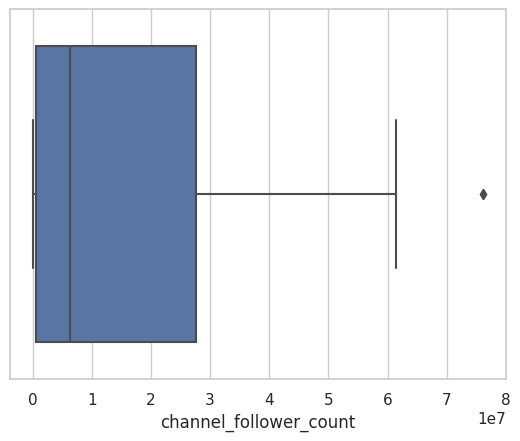

In [21]:
sns.set(style = 'whitegrid')
sns.boxplot(x = 'channel_follower_count' , data = Yt)
plt.show()

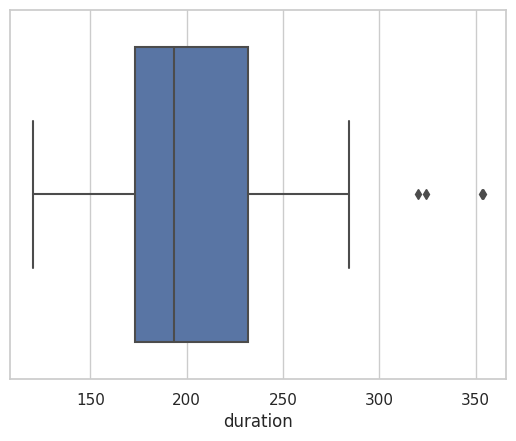

In [22]:
sns.set(style = 'whitegrid')
sns.boxplot(x = 'duration' , data = Yt)
plt.show()

In [23]:
percentile25c = Yt['channel_follower_count'].quantile(0.25)
percentile75c = Yt['channel_follower_count'].quantile(0.75)
percentile25 = Yt['duration'].quantile(0.25)
percentile75 = Yt['duration'].quantile(0.75)

In [24]:
iqr = percentile75 - percentile25
iqrc = percentile75c - percentile25c


In [25]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
upper_limitc = percentile75c + 1.5 * iqrc
lower_limitc = percentile25c - 1.5 * iqrc


In [26]:
Yt['channel_follower_count'] = np.where(
    Yt['channel_follower_count'] > upper_limitc,
    upper_limitc,
    np.where(
        Yt['channel_follower_count'] < lower_limitc,
        lower_limitc,
        Yt['channel_follower_count']
    )
)

In [27]:
Yt['duration'] = np.where(
    Yt['duration'] > upper_limit,
    upper_limit,
    np.where(
        Yt['duration'] < lower_limit,
        lower_limit,
        Yt['duration']
    )
)

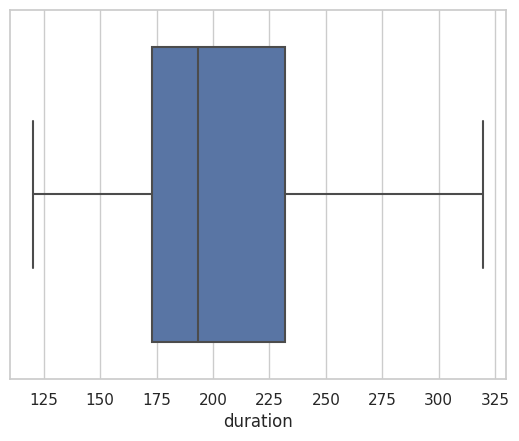

In [28]:
sns.set(style = 'whitegrid')
sns.boxplot(x = 'duration' , data = Yt)
plt.show()

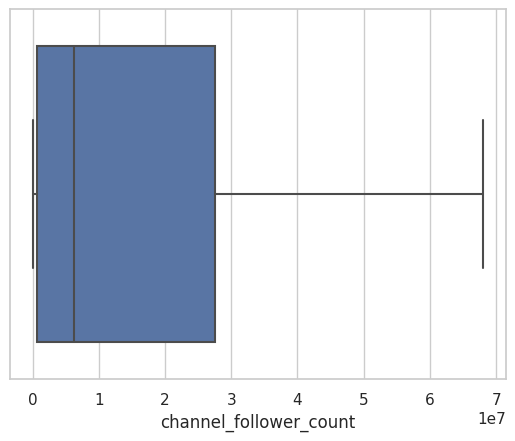

In [29]:
sns.set(style = 'whitegrid')
sns.boxplot(x = 'channel_follower_count' , data = Yt)
plt.show()

# model 

In [30]:
x_train,x_test,y_train,y_test = train_test_split(Yt.drop(columns = ['Hits']),
                                                 Yt['Hits'],test_size = 0.2,
                                                random_state = 42)

In [31]:
x_train.sample(5)

,categories,duration,channel_follower_count
89,Music,195.0,5070000.0
69,Music,219.0,203000.0
74,Music,158.0,5070000.0
5,Music,201.0,12300000.0
95,Music,202.0,56400000.0


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


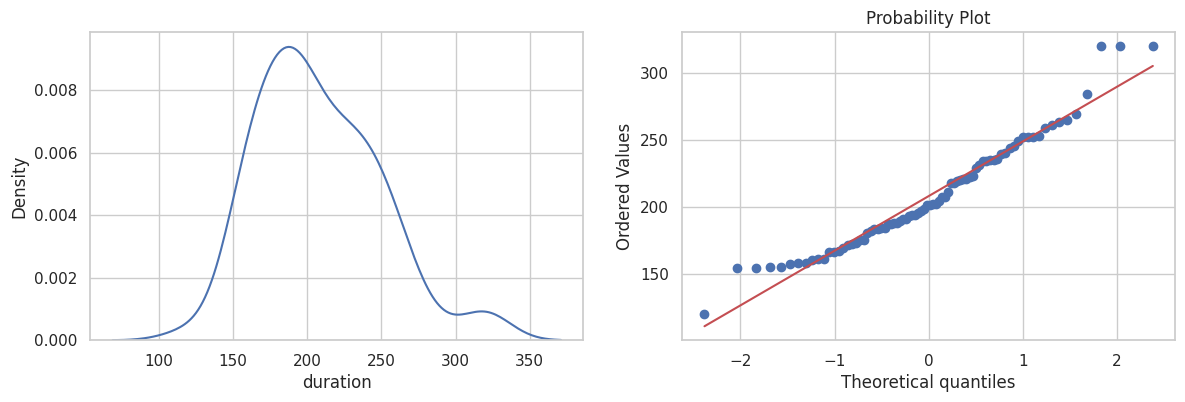

In [32]:
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.kdeplot(x_train['duration'])
plt.subplot(122)
stats.probplot(x_train['duration'],dist = "norm",plot = plt)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


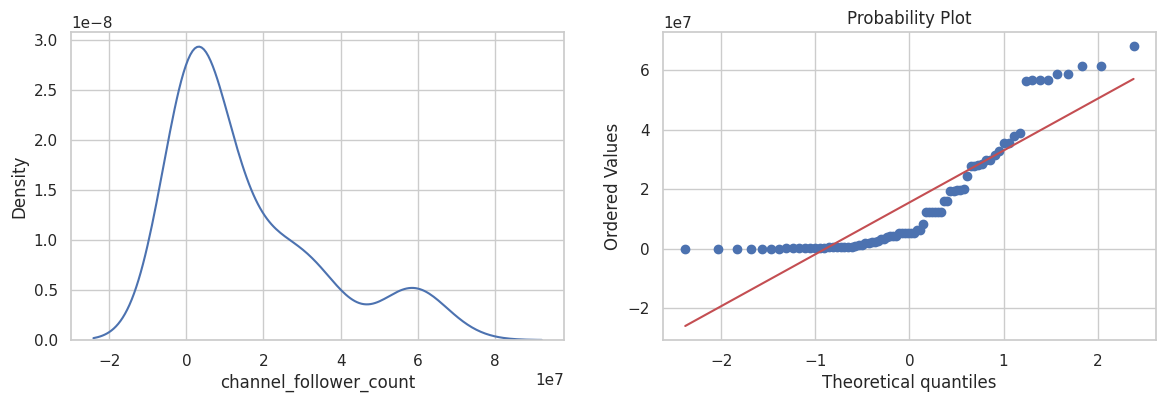

In [33]:
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.kdeplot(x_train['channel_follower_count'])
plt.subplot(122)
stats.probplot(x_train['channel_follower_count'],dist = "norm",plot = plt)
plt.show()

In [34]:
oh = OneHotEncoder(drop = 'first')
x_train_new = oh.fit_transform(x_train[["categories"]]).toarray()
x_test_new = oh.transform(x_test[["categories"]]).toarray()


In [35]:
lr = LogisticRegression()

In [36]:
lr.fit(x_train_new,y_train)

LogisticRegression()

In [37]:
y_pred = lr.predict(x_test_new)

In [38]:
accuracy_score(y_test,y_pred)*100

95.0